[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aangelopoulos/conformal-prediction/blob/main/notebooks/multilabel-classification-mscoco.ipynb)

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.optimize import brentq
!pip install -U --no-cache-dir gdown --pre

In [2]:
# Load cached data
if not os.path.exists('../data'):
    os.system('gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz')
    os.system('tar -xf ../data.tar.gz -C ../')
    os.system('rm ../data.tar.gz')
    
data = np.load('../data/coco/coco-tresnetxl.npz')
example_paths = os.listdir('../data/coco/examples')

sgmd = data['sgmd'] # sigmoid scores
labels = data['labels']
example_indexes = data['example_indexes']

In [3]:
# Problem setup
n=1000 # number of calibration points
alpha = 0.1 # 1-alpha is the desired false negative rate

def false_negative_rate(prediction_set, gt_labels):
    return 1-((prediction_set * gt_labels).sum(axis=1)/gt_labels.sum(axis=1)).mean()

In [4]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (sgmd.shape[0]-n)) > 0
np.random.shuffle(idx)
cal_sgmd, val_sgmd = sgmd[idx,:], sgmd[~idx,:]
cal_labels, val_labels = labels[idx], labels[~idx]

### Conformal risk control happens here

In [ ]:
# Run the conformal risk control procedure
def lamhat_threshold(lam): return false_negative_rate(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/n) #consistent with notebooks/tumor-segmentation.ipynb
lamhat = brentq(lamhat_threshold, 0, 1)
prediction_sets = val_sgmd >= lamhat

In [6]:
# Calculate empirical FNR
print(f"The empirical FNR is: {false_negative_rate(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

The empirical FNR is: 0.09105616807937622 and the threshold value is: 0.7271682322025352


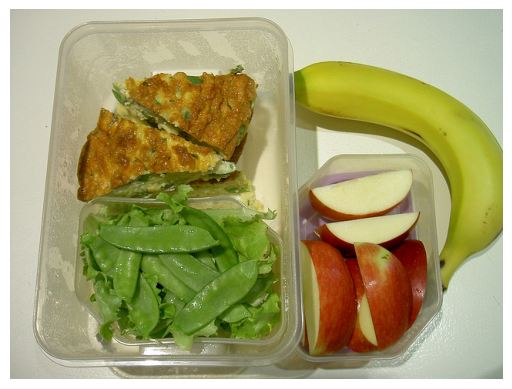

The prediction set is: ['fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'cake', 'dining table']


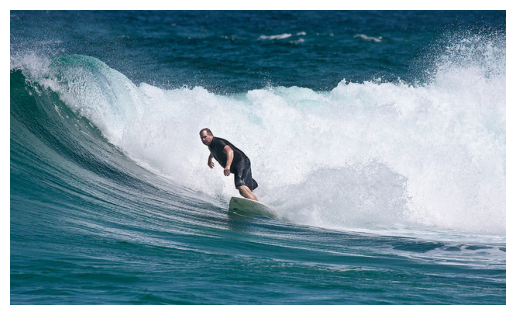

The prediction set is: ['person', 'surfboard']


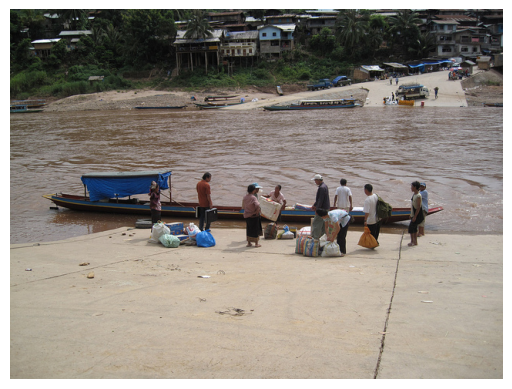

The prediction set is: ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'truck', 'boat', 'bench', 'bird', 'dog', 'cow', 'backpack', 'umbrella', 'handbag', 'kite', 'bottle', 'bowl', 'banana', 'apple', 'chair']


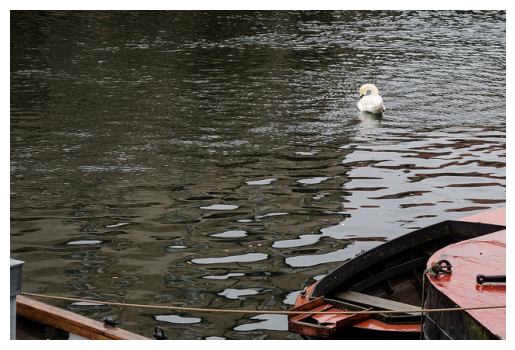

The prediction set is: ['person', 'boat', 'bird']


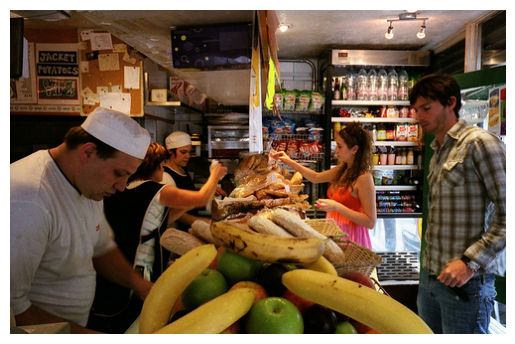

The prediction set is: ['person', 'backpack', 'handbag', 'bottle', 'wine glass', 'cup', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'carrot', 'cake', 'chair', 'dining table', 'tv', 'microwave', 'oven', 'sink', 'refrigerator', 'book', 'clock']


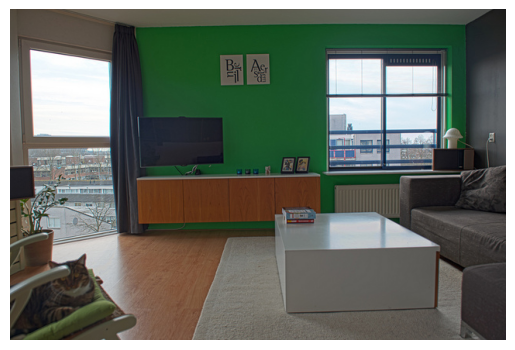

The prediction set is: ['person', 'car', 'bench', 'bird', 'cat', 'dog', 'backpack', 'handbag', 'bottle', 'wine glass', 'cup', 'bowl', 'orange', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'teddy bear']


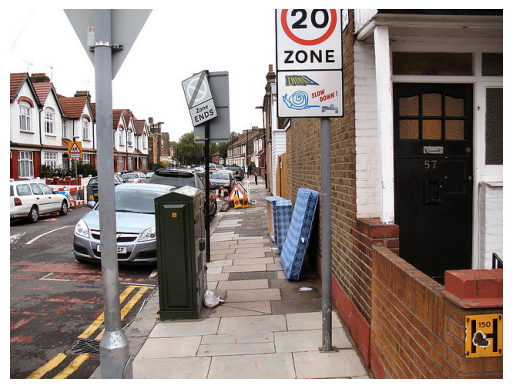

The prediction set is: ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'train', 'truck', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'backpack', 'handbag', 'suitcase', 'chair', 'potted plant', 'bed', 'toilet', 'cell phone', 'refrigerator', 'book', 'clock']


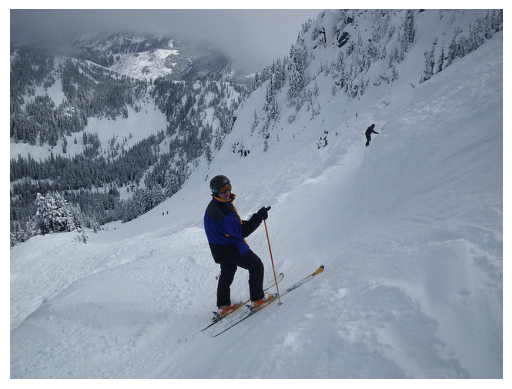

The prediction set is: ['person', 'backpack', 'skis', 'snowboard']


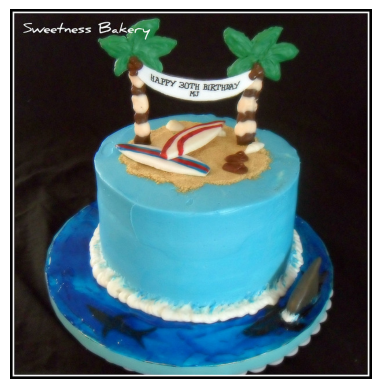

The prediction set is: ['person', 'airplane', 'train', 'bird', 'dog', 'horse', 'zebra', 'tie', 'fork', 'knife', 'spoon', 'bowl', 'cake', 'potted plant', 'dining table']


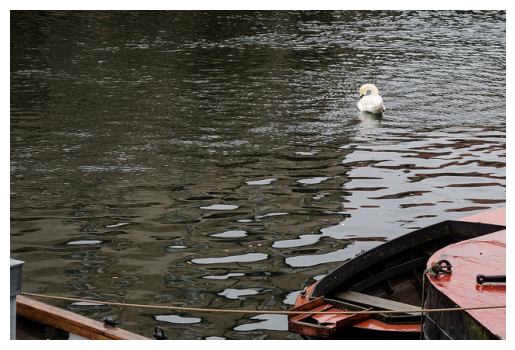

The prediction set is: ['person', 'boat', 'bird']


In [7]:
# Show some examples
label_strings = np.load('../data/coco/human_readable_labels.npy')

example_paths =os.listdir('../data/coco/examples')
for i in range(10):
    rand_path = np.random.choice(example_paths)
    img = imread('../data/coco/examples/' + rand_path )
    img_index = int(rand_path.split('.')[0])
    prediction_set = sgmd[img_index] > 1-lamhat
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(f"The prediction set is: {list(label_strings[prediction_set])}")

This method was first introduced here: https://arxiv.org/abs/2208.02814.